<a href="https://colab.research.google.com/github/muli2487/Twitter-Sentiment-Analysis-and-Bitcoin-Stock-Prediction/blob/master/Time_series_bit_coin_USING_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# First, import the relevant modules
import requests
import json

In [2]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
r= requests.get('https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.json?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-2-29')
print(r.status_code)

200


In [0]:
dict = r.json()

In [4]:
#explore the structure of the dictionary
for key, value in dict.items() :
    print (key)

dataset


In [5]:
print(dict['dataset'])

{'id': 7692468, 'dataset_code': 'MKPRU', 'database_code': 'BCHAIN', 'name': 'Bitcoin Market Price USD', 'description': 'Data showing the USD market price from Mt.gox', 'refreshed_at': '2020-06-13T05:00:45.781Z', 'newest_available_date': '2020-06-14', 'oldest_available_date': '2009-01-03', 'column_names': ['Date', 'Value'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2016-01-01', 'end_date': '2020-02-29', 'data': [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10'

In [6]:
# To make this clearer, let's iterate over the nested elements in the main dictionary

for key, value in dict['dataset'].items():
    print (key, value)

id 7692468
dataset_code MKPRU
database_code BCHAIN
name Bitcoin Market Price USD
description Data showing the USD market price from Mt.gox
refreshed_at 2020-06-13T05:00:45.781Z
newest_available_date 2020-06-14
oldest_available_date 2009-01-03
column_names ['Date', 'Value']
frequency daily
type Time Series
premium False
limit None
transform None
column_index None
start_date 2016-01-01
end_date 2020-02-29
data [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10', 9907.12], ['2020-02-09', 9807.54], ['2020-02-08', 9755.66], ['2020-02-07', 9614.9], ['2020-0

## Calculate what the highest and lowest opening prices were for the stock in this period.

In [7]:
p = dict['dataset']['data']
z= [x[1] for x in p]
res=[]
for val in z:
    if val!= None:
        res.append(val)
print("The maximum opening value in 2016 & 2020 was " +  str(max(res)))
print("The minimum opening value in 2016 & 2020 was " +  str(min(res)))

The maximum opening value in 2016 & 2020 was 19498.6833333
The minimum opening value in 2016 & 2020 was 368.38


In [0]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta 
from tqdm import tqdm_notebook as tqdm
plt.style.use('bmh')

In [0]:
url = url = 'https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-5-29&order=asc'

In [11]:
df= pd.read_csv( url ,index_col = None)
df.head()

,Date,Value
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


In [12]:
df.tail()

,Date,Value
1606,2020-05-25,9178.32
1607,2020-05-26,8730.73
1608,2020-05-27,8899.66
1609,2020-05-28,8842.85
1610,2020-05-29,9197.54


In [13]:
#Cleaning data
df.columns= ['DATE' ,'PRICE']
df.head()

,DATE,PRICE
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


In [0]:
#Covert into Datatime
df['DATE'] = pd.to_datetime(df['DATE'])

In [15]:
df.head()

,DATE,PRICE
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


In [0]:
df.set_index('DATE',inplace =True)

In [17]:
df.head()

,PRICE
DATE,
2016-01-01,429.34
2016-01-02,432.33
2016-01-03,433.94
2016-01-04,428.13
2016-01-05,433.00


In [18]:
df.describe()

,PRICE
count,1611.000000
mean,5176.685005
std,3894.048691
min,368.380000
25%,1000.241000
50%,5269.790000
75%,8153.505833
max,19498.683333


## Visualize the Data

In [0]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

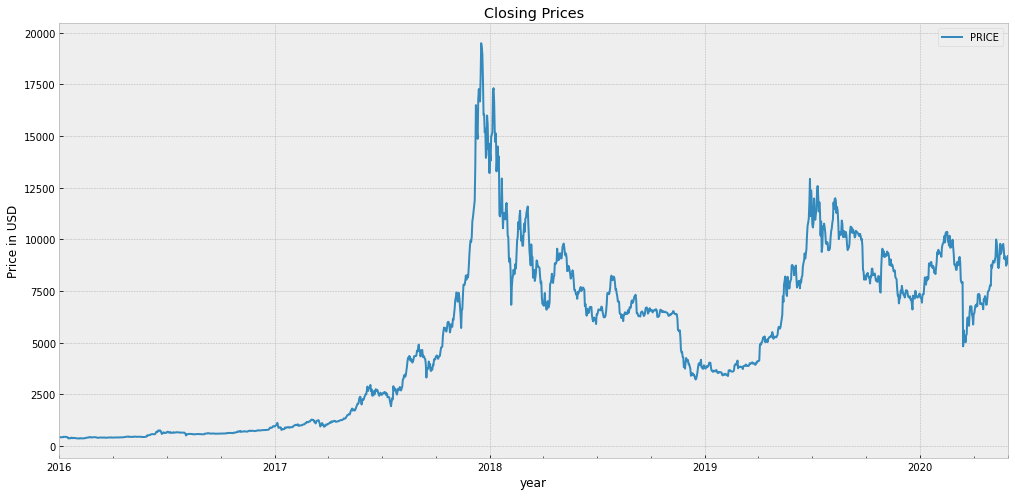

In [20]:
df.plot(figsize=(17,8), title='Closing Prices')
plt.xlabel('year')
plt.ylabel("Price in USD")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

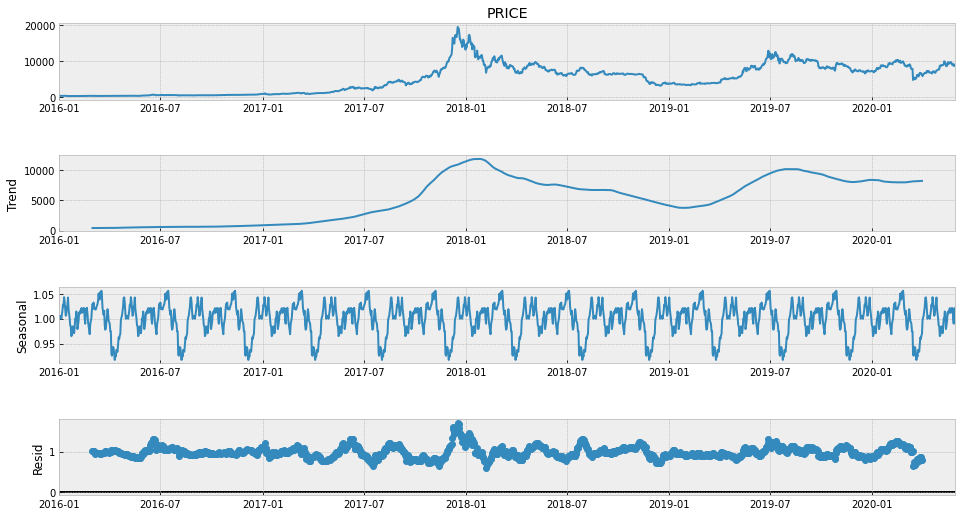

In [21]:
decomposition = seasonal_decompose(df.PRICE, model='multiplicative',freq = 120)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [22]:
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid) 

DATE
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
Name: trend, Length: 1611, dtype: float64
DATE
2016-01-01    1.000028
2016-01-02    1.005914
2016-01-03    1.001310
2016-01-04    1.004708
2016-01-05    0.999895
                ...   
2020-05-25    0.999572
2020-05-26    0.990073
2020-05-27    1.019521
2020-05-28    1.007861
2020-05-29    1.021951
Name: seasonal, Length: 1611, dtype: float64
DATE
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
Name: resid, Length: 1611, dtype: float64


In [0]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [0]:
test_result=adfuller(df['PRICE'])

In [0]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(PRICE):
    result=adfuller(PRICE)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [26]:
adfuller_test(df['PRICE'])

ADF Test Statistic : -1.916871538611568
p-value : 0.3241663041553058
#Lags Used : 24
Number of Observations Used : 1586
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [0]:
df['Price Difference'] = df['PRICE'] - df['PRICE'].shift(1)

In [28]:
 df['PRICE'].shift(1)

DATE
2016-01-01        NaN
2016-01-02     429.34
2016-01-03     432.33
2016-01-04     433.94
2016-01-05     428.13
               ...   
2020-05-25    9167.26
2020-05-26    9178.32
2020-05-27    8730.73
2020-05-28    8899.66
2020-05-29    8842.85
Name: PRICE, Length: 1611, dtype: float64

In [29]:
df.head()

,PRICE,Price Difference
DATE,,
2016-01-01,429.34,NaN
2016-01-02,432.33,2.99
2016-01-03,433.94,1.61
2016-01-04,428.13,-5.81
2016-01-05,433.00,4.87


In [30]:
## Again test dickey fuller test
adfuller_test(df['Price Difference'].dropna())

ADF Test Statistic : -7.831947221576719
p-value : 6.258939460787339e-12
#Lags Used : 23
Number of Observations Used : 1586
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


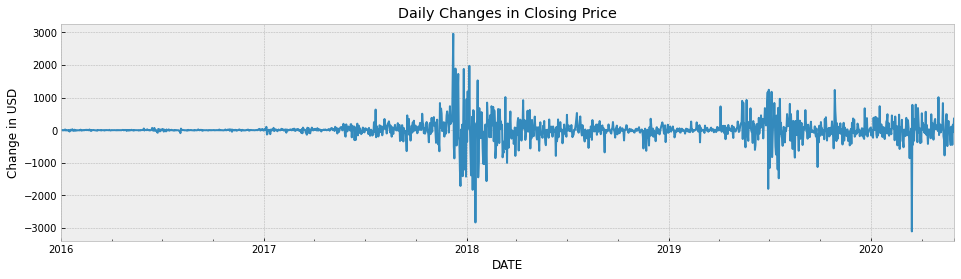

In [31]:
df['Price Difference'].plot(figsize=(16,4), title="Daily Changes in Closing Price")
plt.ylabel("Change in USD")
plt.show()

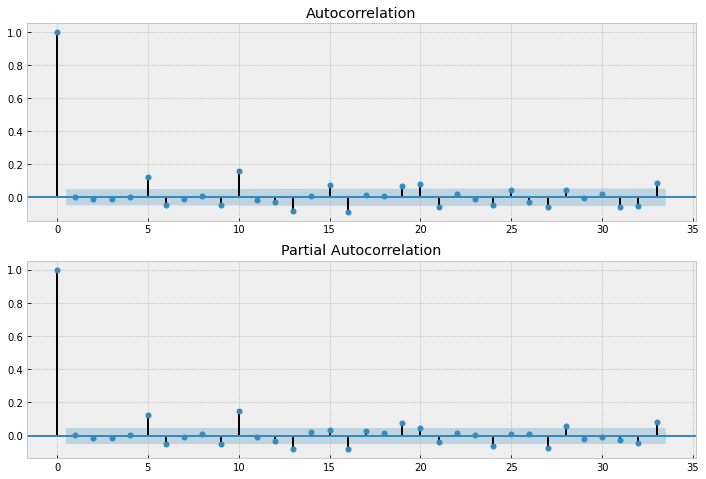

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price Difference'].dropna(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price Difference'].dropna(), ax=ax2)

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['PRICE'],order=(5,1,5))
model_fit=model.fit(disp = 0)



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [36]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.PRICE   No. Observations:                 1610
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -11527.972
Method:                       css-mle   S.D. of innovations            311.417
Date:                Sat, 13 Jun 2020   AIC                          23079.945
Time:                        22:39:51   BIC                          23144.553
Sample:                    01-02-2016   HQIC                         23103.928
                         - 05-29-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4455      8.685      0.627      0.531     -11.577      22.468
ar.L1.D.PRICE    -0.2434      0.154     -1.582      0.114      -0.545       0.058
ar.L2.D.PRICE    -0.2300      0.169     

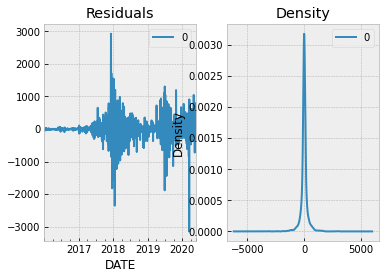

In [37]:

#Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

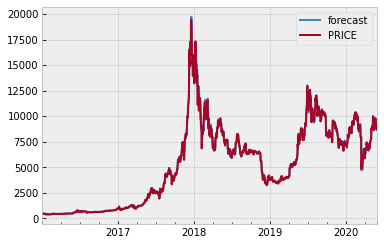

In [38]:
#Let’s plot the actuals against the fitted values using plot_predict().
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [40]:
#How to do find the optimal ARIMA model manually using Out-of-Time Cross validation
#In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.
#To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.PRICE[:1285]
test = df.PRICE[1285:]
#train
test

DATE
2019-07-09    11477.01
2019-07-10    12313.08
2019-07-11    12586.78
2019-07-12    12099.90
2019-07-13    11352.87
                ...   
2020-05-25     9178.32
2020-05-26     8730.73
2020-05-27     8899.66
2020-05-28     8842.85
2020-05-29     9197.54
Name: PRICE, Length: 326, dtype: float64

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


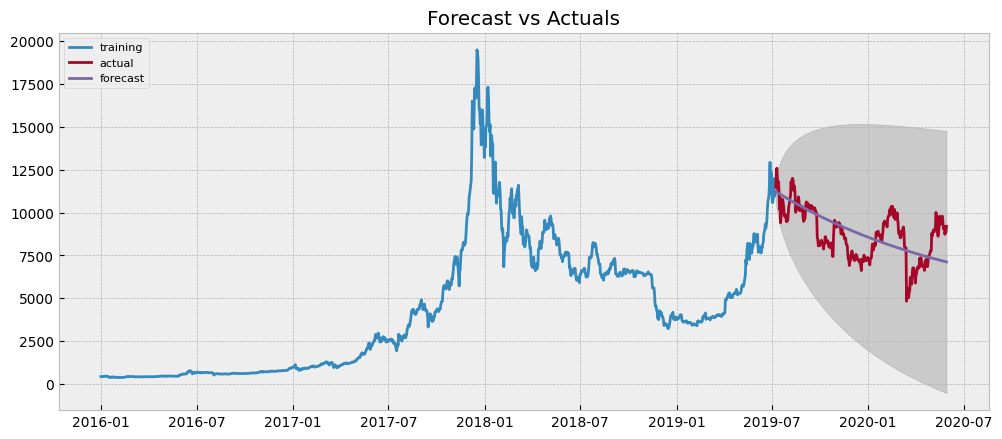

In [55]:
#build the ARIMA model on training dataset, forecast and plot it.
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1,0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(326, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [56]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'acf1': 0.9511301189617692,
 'corr': 0.5802725251426202,
 'mae': 1035.4186258225814,
 'mape': 0.1270703505832962,
 'me': 160.899487611458,
 'minmax': 0.11309662278838839,
 'mpe': 0.03599105728977757,
 'rmse': 1243.1759382224732}

## Auto Arima Forecast in Python

In [43]:
!pip install pmdarima 

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.PRICE, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=23139.434, BIC=23160.970, Time=0.694 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=23135.434, BIC=23146.202, Time=0.061 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=23137.432, BIC=23153.584, Time=0.064 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=23137.436, BIC=23153.588, Time=0.143 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=23133.904, BIC=23139.288, Time=0.033 seconds
Total fit time: 1.006 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1611
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11565.952
Date:                Sat, 13 Jun 2020   AIC                          23133.904
Time:                        22:42:19   BIC                          23139.288
Sample:                             0   HQIC                 

# Residual plots using stepwise_fit.

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast. **bold text**

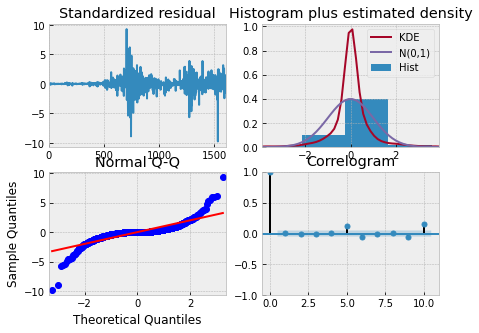

In [45]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

## Seasonal Difference

In [0]:
df['Seasonal First Difference']=df['PRICE']-df['PRICE'].shift(120)

In [48]:
df.head(140)

,PRICE,Price Difference,Seasonal First Difference
DATE,,,
2016-01-01,429.34,NaN,NaN
2016-01-02,432.33,2.99,NaN
2016-01-03,433.94,1.61,NaN
2016-01-04,428.13,-5.81,NaN
2016-01-05,433.00,4.87,NaN
...,...,...,...
2016-05-15,455.65,-1.17,64.03
2016-05-16,457.08,1.43,86.68
2016-05-17,454.88,-2.20,69.43


In [49]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.921545644346556
p-value : 0.042899287858174595
#Lags Used : 24
Number of Observations Used : 1466
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


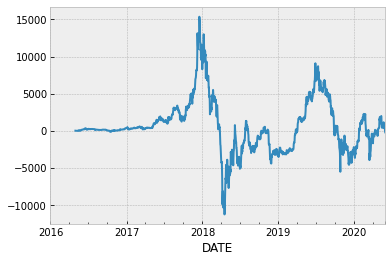

In [50]:
df['Seasonal First Difference'].plot()

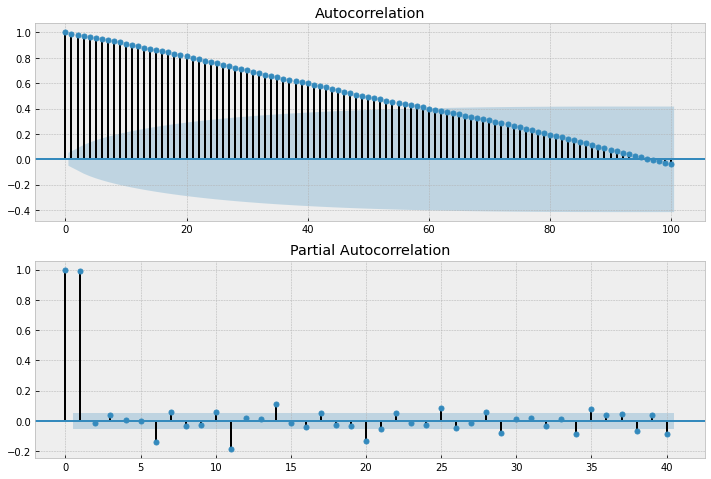

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[120:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[120:], lags=40, ax=ax2)

## SARIMA

In [52]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df['Seasonal First Difference'].dropna(), start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=22368.099, BIC=22394.594, Time=16.145 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=26072.541, BIC=26083.139, Time=0.118 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=22948.477, BIC=22969.673, Time=10.391 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=24664.141, BIC=24685.337, Time=11.736 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=26070.600, BIC=26075.899, Time=0.061 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=23288.727, BIC=23309.923, Time=1.007 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=22369.678, BIC=22401.473, Time=21.285 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=22369.617, BIC=22401.412, Time=53.304 seconds
Near non-invertible roots for or

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1491
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood              -11157.322
Date:                                 Sat, 13 Jun 2020   AIC                          22328.644
Time:                                         22:51:26   BIC                          22365.738
Sample:                                              0   HQIC                         22342.472
                                                - 1491                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.727e-06      0.105  -8.33e-05      1.000      -0.205       0.205
ar.L1          1.0000      0.020     50.437      0.000       0.961       1.039
ma.L1          0.0119      0.016      0.753      0.452      -0.019       0.043
ar.S.L12      -0.9170      0.018    -51.825      0.000      -0.952      -0.882
ma.S.L12   -4.459e-06     95.205  -4.68e-08      1.000    -186.598     186.598
ma.S.L24      -1.0000      0.031    -32.045      0.000      -1.061      -0.939
sigma2      1.989e+05      0.000   4.15e+08      0.000    1.99e+05    1.99e+05
===================================================================================
Ljung-Box (Q):                      228.89   Jarque-Bera (JB):              6742.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              27.03   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+26. Standard errors may be unstable.
"""